# Getting Started

Welcome to COMP9417!  Throughout this course, you will be introduced to a variety of machine learning algorithms.  These labs are intended to give you practical experience with setting up and running these algorithms on realistic data sets.

There are a few concepts you should have a strong understanding of to complete this work:
* <a href="http://onlinestatbook.com/2/regression/intro.html">Linear Regressions</a>
* <a href="http://www.tutorialspoint.com/python/python_basic_syntax.htm">Basic Python</a>

## Welcome to python

For the lab work in this course, we will be using the Python language, which you may or may not have used before.  If not, it may help you to do some independent study to pick up the basics.  However, this is not a Python course - the focus is on applying practical machine learning algorithms, and Python is simply a tool for us to do so.

We will be utilising a number of third-party Python libraries in this course:
* <b>Numpy</b> is a popular library for performing mathematical operations. 
* <b>Matplotlib</b> is a 2D plotting library for easy display of data. 
* <b>SciKit-Learn</b> is a full-featured machine learning algorithm, which we will use to set up and run ML algorithms throughout the course.

First thing's first!  To use these libraries in python, we need to <b>import</b> them into our program.  To import a library (also called a module), you simply type "import X", where X is the name of the module.  You can also use the "as" keyword to specify a handle for the module which is quicker and easier to type.

The code below uses some of numpy's features to generate some pseudorandom data, which is then plotted using matplotlib.  Read through the code and ensure you understand what is happening and how it works.  Try tweaking N and the numbers to create new plots.  Try performing different transforms on $x$ and see what happens.

To run code in the Jupyter environment, you simply click in the code area and type <b>ctrl+enter</b>

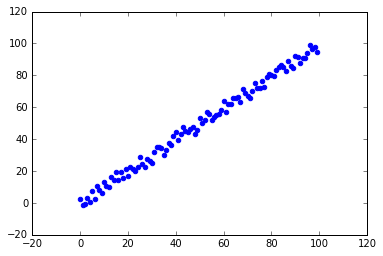

In [8]:
import matplotlib.pyplot as plt
import numpy as np

N = 100
data_x = np.arange(N) # Generate an array with values from 0 to N
rdm = (np.random.rand(N)-0.5) # Random noise generator. rand(N) returns N random numbers between 0 and 1
data_y1 = data_x + rdm*10  # Linear wrt x, with noise
data_y2 = np.sqrt(data_x) + rdm # Square root of x, with noise
data_y3 = data_x**2 + rdm*1000 # x squared, with noise
plt.scatter(data_x,data_y1,color='blue') # Scatter plot; color parameter is optional
#plt.plot(data_x,data_y1) # Line plot
plt.show()

## Reading Datasets

In order to perform machine learning, we typically need a significant amount of data.  By understanding the data, analysing patterns and training our algorithms, we can achieve meaningful results.  Scikit-learn makes it easy for us to access some pre-defined 'toy' datasets to practice our understanding. 

In this example, we'll use the "diabetes" dataset, which contains records for 442 diabetes patients.  The 10 features in the dataset represent each patient's age, sex, body mass index, average blood pressure, and six blood serum measurements.  The response of interest is a quantitative measure of disease progression one year after baseline.  We'll use this to find a regression to predict a patient's disease progression based on any of their features.

Modify the code below to understand how this particular data is structured.  Later, we'll apply a linear regression to the data, but some features will be better suited to this than others.  Try to find which feature has the most linear relationship to the target. 

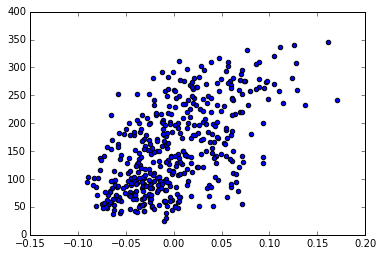

In [9]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets

#load the diabetes dataset
diabetes = datasets.load_diabetes()
#Extract a single feature
fnum = 2 ### Test different features 
data_x = diabetes.data[:,np.newaxis,fnum]
data_y = diabetes.target

plt.scatter(data_x,data_y)
plt.show()

The data in this set is quite scattered, so it may be hard to tell which is most linear.  However, it should be easy to see which are not!

## Linear Regression

Now that we have a dataset loaded, and a feature of interest selected, we can try to fit a linear regression.  Scikit-learn has methods for accomplishing this very simply.  There are two steps involved:
1. Training the model: the linear regression model must be trained by supplying it with a sample feature set, and the corresponding targets.
2. Prediction: once the model is trained, you can provide it with a number of sample points and it will return its predicted targets.

After training the model, we can see the coefficients of the model; i.e., find the *regression coefficient* $a$ and the *intercept* $b$ in the (univariate) linear regression formula $y = ax + b$.
We can also calculate the mean squared error of the model points to give us something to compare models and feature choice.

Fill in the code necessary to load the dataset, train and visualise the linear regression.

('Coefficients: ', array([ 949.43526038]), 152.13348416289671)
Mean squared error: 3890.46


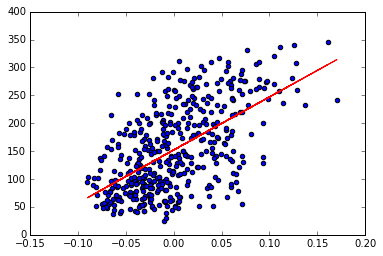

In [28]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets,linear_model

#load the diabetes dataset
diabetes = datasets.load_diabetes()
#Extract a single feature
fnum = 2
data_x = diabetes.data[:,np.newaxis,fnum]
data_y = diabetes.target

#Create linear regression model
regr = linear_model.LinearRegression()
#Train the model
regr.fit(data_x,data_y)
#Predict the targets
predicted_y = regr.predict(data_x)

#Output the coefficient
print('Coefficients: ', regr.coef_, regr.intercept_)
#Calculate the Mean Squared Error
mse = np.mean((predicted_y - data_y) ** 2)
print ("Mean squared error: %.2f" % mse)

plt.scatter(data_x,data_y)
plt.plot(data_x,predicted_y,color="red")
plt.show()

If done correctly, you should end up with a linear regression (i.e. straight line) which approximately follows the shape of the scattered data, with an MSE under 4000.  You can try using other features in the dataset to see how the linearity of the data affects the MSE.  

## Test vs Training set

Typically, we do not want to test our model on the data with which we trained it, as this will not provide an accurate assessment of the model.  However, we only have a limited amount of data to work with in this case.  One way around this issue is to split the data into a 'training set' and a much smaller 'test set'.  In this example, we'll take 20 data points out of the dataset to use as our test set, and leave the rest for training. 

Change the code below to use the test and training set rather than the dataset as a whole.  Note, the array indexing we use to extract the test set is provided by the Numpy module.

How is the mean squared error (MSE) affected when we check our model with the test set?  Why?
Try adjusting $N$ and see how the model accuracy is affected.

(442,)
('Coefficients: ', array([ 952.82712752]))
Mean squared error: 3222.53


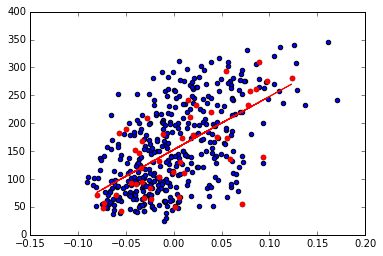

In [27]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model

#Load the diabetes dataset
diabetes = datasets.load_diabetes()

#Extract a single feature
fnum = 2
data_x = diabetes.data[:,np.newaxis,fnum]
data_y = diabetes.target

print data_y.shape

#Split the data into training and testing subsets
#Since there are 442 instances in that dataset, choose test sets of size approximately 5%, 10%, 30% and 50%
# N = 22 # Mean squared error: 2432.24
N = 44 # Mean squared error: 3222.53
# N = 133 # Mean squared error: 3673.67
# N = 221 # Mean squared error: 3878.73
test_x = data_x[-N:]
train_x = data_x[:-N]
#Split the corresponding targets as well; make sure the indices match the data!
test_y = data_y[-N:]
train_y = data_y[:-N]

#Create linear regression model
regr = linear_model.LinearRegression()
#Train the model
regr.fit(train_x,train_y)
#Predict the targets
predicted_y = regr.predict(test_x)

#Output the coefficient
print('Coefficients: ', regr.coef_, regr.intercept_)
#Calculate the Mean Squared Error
mse = np.mean((predicted_y - test_y) ** 2)
print ("Mean squared error: %.2f" % mse)

plt.scatter(data_x,data_y)
plt.scatter(test_x,test_y, color="red")
plt.plot(test_x,predicted_y,color="red")
plt.show()

Using a separate test and training set is a better way to determine model accuracy than using the whole dataset.  More advanced methods of model validation involve taking different subsets as the test set to train 10 or more different models, then averaging out their performance.  This produces a far more accurate assessment of the model, and we will look at this (ten-fold cross-validation) in later weeks.

To answer the question, as the proportion of data used for training the linear regression is varied, with more of the examples going to the test set, we can see MSE increasing (as *N* is increased). This is because reducing the amount of data used in training leads to a less accurate model. 

# Running a full regression

Let's put together what we've learned!

Another commonly used dataset for regression is the Boston house-price dataset.  This dataset represents housing values in 506 suburbs in Boston, containing 14 different features, described <a href="http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html">here</a>.

Fill in the blanks in the code below to load the dataset (load_boston()) and perform a linear regression on a feature which demonstrates a roughly linear relationship to the target parameter.  Finally, display the MSE and plot the regression.

('Coefficients: ', array([ 1.04990962]))
Mean squared error: 29.56


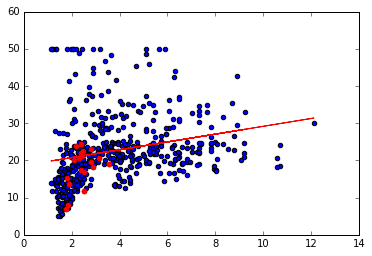

In [11]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets,linear_model

#load the boston dataset
diabetes = datasets.load_boston()
#Extract a single feature
fnum = 7
data_x = diabetes.data[:,np.newaxis,fnum]
data_y = diabetes.target

#Split the data into training and testing subsets
N = 20
test_x = data_x[-N:]
train_x = data_x[:-N]
#Split the corresponding targets as well; make sure the indices match the data!
test_y = data_y[-N:]
train_y = data_y[:-N]

#Create linear regression model
regr = linear_model.LinearRegression()
#Train the model
regr.fit(train_x,train_y)

#Output the coefficient
print('Coefficients: ', regr.coef_)
#Calculate the Mean Squared Error
mse = np.mean((regr.predict(test_x) - test_y) ** 2)
print ("Mean squared error: %.2f" % mse)

plt.scatter(data_x,data_y)
plt.scatter(test_x,test_y, color="red")
plt.plot(train_x,regr.predict(train_x),color="red")
plt.show()

You should now be able to load datasets, perform basic ML algorithms and plot the results using python and scikitlearn.  Note that the code you've written here can be run straight from python (given the modules are present on your system), so you can test this outside the Jupyter environment. 